In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# Data collection and Processing

In [91]:
# Loading the data into a pandas. data frame
housing_df = pd.read_csv(r"C:\Users\chinm\OneDrive\Desktop\Data\Housing.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [92]:
# Getting the number of rows and columns
housing_df.shape

(545, 13)

In [93]:
# Checking for null values
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [94]:
# Statistical measures of the data
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [95]:
# Getting the information about the data set 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [96]:
# Handling categorial data
categorial = [var for var in housing_df.columns if housing_df[var].dtype=='O']

print('There are {} categorial varibles\n'.format(len(categorial)))

print('The categorial variables are :\n\n', categorial)

There are 7 categorial varibles

The categorial variables are :

 ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [97]:
housing_df[categorial].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [98]:
housing_df[categorial].isnull().sum()

mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
prefarea            0
furnishingstatus    0
dtype: int64

In [99]:
# Getting individual value count of each categorial varaibles
for var in categorial:
        print(housing_df[var].value_counts())

yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [100]:
# (labels can be known in the valuecounts() method as well) 
# But here we can get a clear picture
for var in categorial:
    print(var, 'contains', len(housing_df[var].unique()), 'labels')

mainroad contains 2 labels
guestroom contains 2 labels
basement contains 2 labels
hotwaterheating contains 2 labels
airconditioning contains 2 labels
prefarea contains 2 labels
furnishingstatus contains 3 labels


# Encoding the categorial data

In [101]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

housing_df = encoder.fit_transform(housing_df)

In [102]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad_1,mainroad_2,guestroom_1,guestroom_2,basement_1,...,hotwaterheating_1,hotwaterheating_2,airconditioning_1,airconditioning_2,parking,prefarea_1,prefarea_2,furnishingstatus_1,furnishingstatus_2,furnishingstatus_3
0,13300000,7420,4,2,3,1,0,1,0,1,...,1,0,1,0,2,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,1,0,1,...,1,0,1,0,3,0,1,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,0,0,1,2,1,0,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,0,...,1,0,1,0,3,1,0,1,0,0
4,11410000,7420,4,1,2,1,0,0,1,0,...,1,0,1,0,2,0,1,1,0,0


In [103]:
housing_df.shape

(545, 21)

# Separating or splitting features and the target

In [104]:
X = housing_df.drop(['price'], axis =1)

Y = housing_df['price']

In [105]:
print(X)

     area  bedrooms  bathrooms  stories  mainroad_1  mainroad_2  guestroom_1  \
0    7420         4          2        3           1           0            1   
1    8960         4          4        4           1           0            1   
2    9960         3          2        2           1           0            1   
3    7500         4          2        2           1           0            1   
4    7420         4          1        2           1           0            0   
..    ...       ...        ...      ...         ...         ...          ...   
540  3000         2          1        1           1           0            1   
541  2400         3          1        1           0           1            1   
542  3620         2          1        1           1           0            1   
543  2910         3          1        1           0           1            1   
544  3850         3          1        2           1           0            1   

     guestroom_2  basement_1  basement_

In [106]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [107]:
# Splitting the data into training data and testing data

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [108]:
print(X.shape, x_train.shape, x_test.shape)

(545, 20) (436, 20) (109, 20)


# Model Training

In [109]:
#LINEAR REGRESSION

# loading the linear regression model
linreg_model = LinearRegression()

In [110]:
linreg_model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [89]:
# Prediction on training data
training_data_pred = linreg_model.predict(x_train)

In [111]:
# R sqaure error
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared Error :", error_score)

R squared Error : 0.6918324307049804


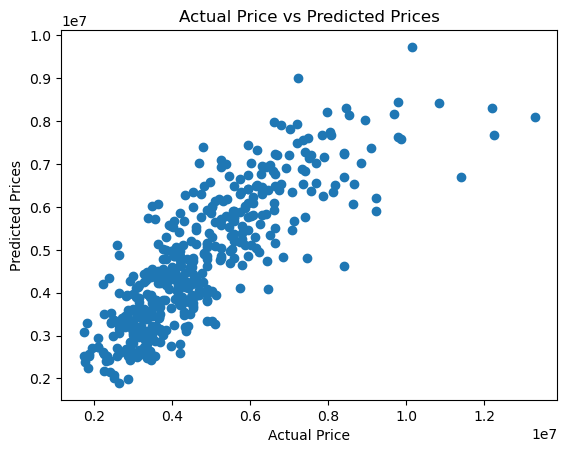

In [112]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [114]:
# Prediction on testing data
testing_data_pred = linreg_model.predict(x_test)

In [115]:
# R sqaure error
error_score = metrics.r2_score(y_test, testing_data_pred)
print("R squared Error :", error_score)

R squared Error : 0.6298518608872237


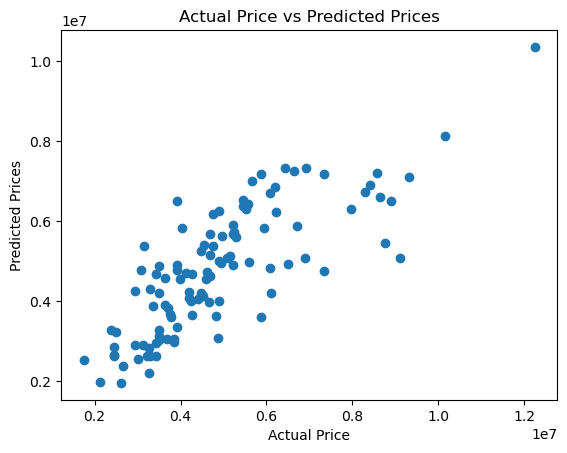

In [116]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test, testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()